In [1]:
library(DiffBind)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


At

In [3]:
CorcesDataInfo =read.csv("./buenrostro2018_combined_sc_pseudobulk_with_replicates_peakSet.csv",
                          sep = ";",stringsAsFactors=FALSE) #, header=TRUE,row.names=NULL
head(CorcesDataInfo)


,SampleID,Tissue,Condition,DonorID,Treatment,bamReads,Replicate,ControlID,Peaks,PeakCaller
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,CMP_1,CMP,CMP,1,control,/project/scATAC_analysis/Corces2018_BM_FACS_scATAC/analysis/get_pseudobulk_as_combined_scs/2replicates_per_cellType/combined_bam_files/CMP_1_combined.bam,1,CMP,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/01_synthetic_prototypes_ENCODE_cCRE_coverage/CMP_1_combined_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
2,CMP_2,CMP,CMP,1,control,/project/scATAC_analysis/Corces2018_BM_FACS_scATAC/analysis/get_pseudobulk_as_combined_scs/2replicates_per_cellType/combined_bam_files/CMP_2_combined.bam,2,CMP,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/01_synthetic_prototypes_ENCODE_cCRE_coverage/CMP_2_combined_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
3,HSC_1,HSC,HSC,1,control,/project/scATAC_analysis/Corces2018_BM_FACS_scATAC/analysis/get_pseudobulk_as_combined_scs/2replicates_per_cellType/combined_bam_files/HSC_1_combined.bam,1,HSC,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/01_synthetic_prototypes_ENCODE_cCRE_coverage/HSC_1_combined_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
4,HSC_2,HSC,HSC,1,control,/project/scATAC_analysis/Corces2018_BM_FACS_scATAC/analysis/get_pseudobulk_as_combined_scs/2replicates_per_cellType/combined_bam_files/HSC_2_combined.bam,2,HSC,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/01_synthetic_prototypes_ENCODE_cCRE_coverage/HSC_2_combined_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
5,GMP_1,GMP,GMP,1,control,/project/scATAC_analysis/Corces2018_BM_FACS_scATAC/analysis/get_pseudobulk_as_combined_scs/2replicates_per_cellType/combined_bam_files/GMP_1_combined.bam,1,GMP,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/01_synthetic_prototypes_ENCODE_cCRE_coverage/GMP_1_combined_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
6,GMP_2,GMP,GMP,1,control,/project/scATAC_analysis/Corces2018_BM_FACS_scATAC/analysis/get_pseudobulk_as_combined_scs/2replicates_per_cellType/combined_bam_files/GMP_2_combined.bam,2,GMP,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/01_synthetic_prototypes_ENCODE_cCRE_coverage/GMP_2_combined_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed


In [4]:
corces_DBdata <- dba(sampleSheet=CorcesDataInfo) 

CMP_1 CMP  CMP control 1 bed

CMP_2 CMP  CMP control 2 bed

HSC_1 HSC  HSC control 1 bed

HSC_2 HSC  HSC control 2 bed

GMP_1 GMP  GMP control 1 bed

GMP_2 GMP  GMP control 2 bed

MEP_1 MEP  MEP control 1 bed

MEP_2 MEP  MEP control 2 bed

MPP_1 MPP  MPP control 1 bed

MPP_2 MPP  MPP control 2 bed

CLP_1 CLP  CLP control 1 bed

CLP_2 CLP  CLP control 2 bed

LMPP_1 LMPP  LMPP control 1 bed

LMPP_2 LMPP  LMPP control 2 bed



In [5]:
corces <- dba.count(corces_DBdata)

Computing summits...

Re-centering peaks...

Reads will be counted as Paired-end.



In [6]:
info <- dba.show(corces)
libsizes <- cbind(LibReads=info$Reads, FRiP=info$FRiP,PeakReads=round(info$Reads * info$FRiP))
rownames(libsizes) <- info$ID
head(libsizes)


,LibReads,FRiP,PeakReads
CMP_1,7660776,0.54,4136819
CMP_2,6756627,0.58,3918844
HSC_1,3081323,0.60,1848794
HSC_2,2210133,0.62,1370282
GMP_1,1528834,0.51,779705
GMP_2,2058920,0.63,1297120


In [7]:
corces_norm <- dba.normalize(corces)
norm <- dba.normalize(corces_norm, bRetrieve=TRUE)
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
rownames(normlibs) <- info$ID
head(normlibs)


,FullLibSize,NormFacs,NormLibSize
CMP_1,7660776,3.1993332,2394491
CMP_2,6756627,2.8217378,2394491
HSC_1,3081323,1.2868382,2394491
HSC_2,2210133,0.9230073,2394491
GMP_1,1528834,0.6384796,2394491
GMP_2,2058920,0.8598569,2394491


In [8]:
corces_norm <- dba.contrast(corces_norm, categories=DBA_CONDITION,minMembers = 2)

Computing results names...



In [9]:
corces_norm <- dba.analyze(corces_norm)


Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg38

Applying blacklist...

Removed: 232 of 513811 intervals.

Re-normalizing...

Removed 232 (of 513811) consensus peaks.

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [11]:
contrast_matrix = dba.show(corces_norm, bContrasts = TRUE)
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,CMP,2,HSC,2,653
2,Condition,CMP,2,GMP,2,875
3,Condition,CMP,2,MEP,2,1637
4,Condition,CMP,2,MPP,2,71
5,Condition,CMP,2,CLP,2,2040
6,Condition,CMP,2,LMPP,2,788
7,Condition,HSC,2,GMP,2,787
8,Condition,HSC,2,MEP,2,7053
9,Condition,HSC,2,MPP,2,0


In [12]:
granges_to_df <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    report_df <- as.data.frame(report)
    region= paste(report_df$seqnames,report_df$start,sep=":")
    region=paste(region,report_df$end,sep="-")
    report_df["region"]=region
    return(report_df)
}

In [13]:
for (i in seq(1, NROW(contrast_matrix))){
    save_name = paste( gsub("-", "_", contrast_matrix[i,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[i,4], fixed = TRUE), sep="")
    
    print(save_name)
}

[1] "CMP_VS_HSC"
[1] "CMP_VS_GMP"
[1] "CMP_VS_MEP"
[1] "CMP_VS_MPP"
[1] "CMP_VS_CLP"
[1] "CMP_VS_LMPP"
[1] "HSC_VS_GMP"
[1] "HSC_VS_MEP"
[1] "HSC_VS_MPP"
[1] "HSC_VS_CLP"
[1] "HSC_VS_LMPP"
[1] "GMP_VS_MEP"
[1] "GMP_VS_MPP"
[1] "GMP_VS_CLP"
[1] "GMP_VS_LMPP"
[1] "MEP_VS_MPP"
[1] "MEP_VS_CLP"
[1] "MEP_VS_LMPP"
[1] "MPP_VS_CLP"
[1] "MPP_VS_LMPP"
[1] "LMPP_VS_CLP"


In [14]:
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,CMP,2,HSC,2,653
2,Condition,CMP,2,GMP,2,875
3,Condition,CMP,2,MEP,2,1637
4,Condition,CMP,2,MPP,2,71
5,Condition,CMP,2,CLP,2,2040
6,Condition,CMP,2,LMPP,2,788
7,Condition,HSC,2,GMP,2,787
8,Condition,HSC,2,MEP,2,7053
9,Condition,HSC,2,MPP,2,0


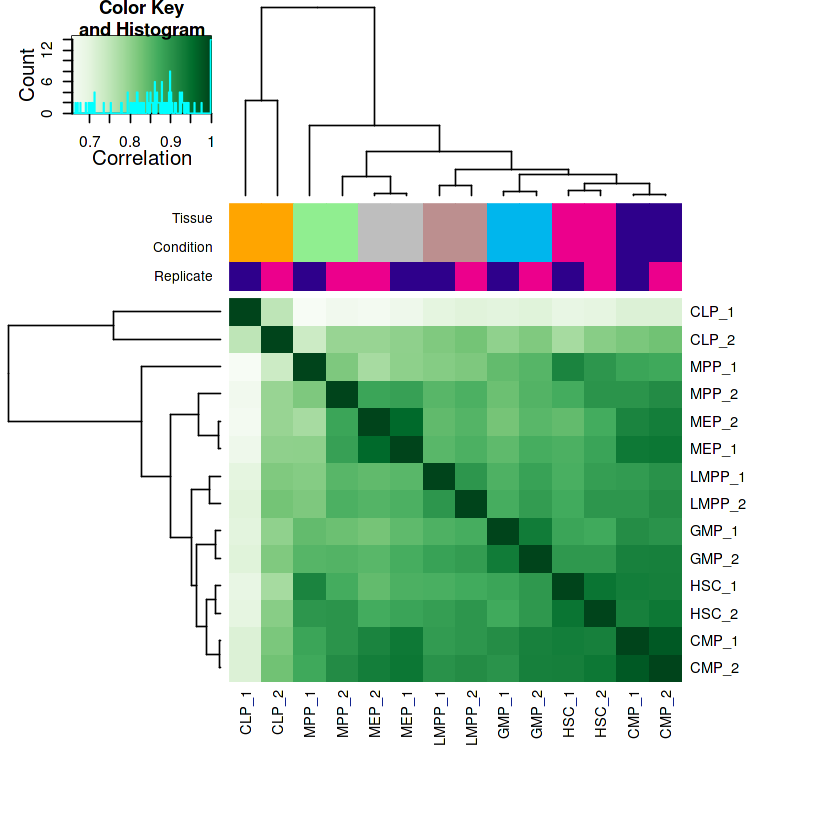

In [15]:
plot(corces_norm)

In [16]:
CMP_VS_HSC_df = granges_to_df(corces_norm, contrast = 1)
CMP_VS_GMP_df = granges_to_df(corces_norm, contrast = 2)
CMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 3)
CMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 4)
CMP_VS_CLP_df = granges_to_df(corces_norm, contrast = 5)
CMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 6)
HSC_VS_GMP_df = granges_to_df(corces_norm, contrast = 7)
HSC_VS_MEP_df = granges_to_df(corces_norm, contrast = 8)
HSC_VS_MPP_df = granges_to_df(corces_norm, contrast = 9)
HSC_VS_CLP_df = granges_to_df(corces_norm, contrast = 10)
HSC_VS_LMPP_df = granges_to_df(corces_norm, contrast = 11)
GMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 12)
GMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 13)
GMP_VS_CLP_df = granges_to_df(corces_norm, contrast = 14)
GMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 15)
MEP_VS_MPP_df = granges_to_df(corces_norm, contrast = 16)
MEP_VS_CLP_df = granges_to_df(corces_norm, contrast = 17)
MEP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 18)
MPP_VS_CLP_df = granges_to_df(corces_norm, contrast = 19)
MPP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 20)
LMPP_VS_CLP_df = granges_to_df(corces_norm, contrast = 21)


Warning message:
“No sites above threshold”


In [17]:
combined_regions =c()
for (df_ in list(CMP_VS_HSC_df, CMP_VS_GMP_df, CMP_VS_MEP_df, CMP_VS_MPP_df, CMP_VS_CLP_df, CMP_VS_LMPP_df, HSC_VS_GMP_df, HSC_VS_MEP_df, HSC_VS_MPP_df, HSC_VS_CLP_df, HSC_VS_LMPP_df, GMP_VS_MEP_df, GMP_VS_MPP_df, GMP_VS_CLP_df, GMP_VS_LMPP_df, MEP_VS_MPP_df, MEP_VS_CLP_df, MEP_VS_LMPP_df, MPP_VS_CLP_df, MPP_VS_LMPP_df, LMPP_VS_CLP_df)){
    combined_regions =  c(combined_regions,df_[["region"]] )
    }

In [18]:
sum_=0
combined_regions_size =c()
for (df_ in list(CMP_VS_HSC_df, CMP_VS_GMP_df, CMP_VS_MEP_df, CMP_VS_MPP_df, CMP_VS_CLP_df, CMP_VS_LMPP_df, HSC_VS_GMP_df, HSC_VS_MEP_df, HSC_VS_MPP_df, HSC_VS_CLP_df, HSC_VS_LMPP_df, GMP_VS_MEP_df, GMP_VS_MPP_df, GMP_VS_CLP_df, GMP_VS_LMPP_df, MEP_VS_MPP_df, MEP_VS_CLP_df, MEP_VS_LMPP_df, MPP_VS_CLP_df, MPP_VS_LMPP_df, LMPP_VS_CLP_df)){
    combined_regions_size = c(combined_regions_size,as.numeric(as.character(dim(df_)[1])) )
    print(dim(df_))
    sum_=sum_+as.integer(NROW(df_))
    }

[1] 653  12
[1] 875  12
[1] 1637   12
[1] 71 12
[1] 2040   12
[1] 788  12
[1] 787  12
[1] 7053   12
[1] 0 1
[1] 668  12
[1] 71 12
[1] 8602   12
[1] 942  12
[1] 153  12
[1] 95 12
[1] 3364   12
[1] 3239   12
[1] 5438   12
[1] 1024   12
[1] 55 12
[1] 551  12


In [23]:
# plot the number of diff regions per comparison

comparisons <- c("CMP_VS_HSC_df", "CMP_VS_GMP_df", "CMP_VS_MEP_df", "CMP_VS_MPP_df", "CMP_VS_CLP_df", "CMP_VS_LMPP_df", "HSC_VS_GMP_df", "HSC_VS_MEP_df", "HSC_VS_MPP_df", "HSC_VS_CLP_df", "HSC_VS_LMPP_df", "GMP_VS_MEP_df", "GMP_VS_MPP_df", "GMP_VS_CLP_df", "GMP_VS_LMPP_df", "MEP_VS_MPP_df", "MEP_VS_CLP_df", "MEP_VS_LMPP_df", "MPP_VS_CLP_df", "MPP_VS_LMPP_df", "LMPP_VS_CLP_df")

num_diff_reg <- combined_regions_size 
num_diff_reg_per_comparison_df <- data.frame(comparisons,num_diff_reg)
num_diff_reg_per_comparison_df

comparisons,num_diff_reg
<chr>,<dbl>
CMP_VS_HSC_df,653
CMP_VS_GMP_df,875
CMP_VS_MEP_df,1637
CMP_VS_MPP_df,71
CMP_VS_CLP_df,2040
CMP_VS_LMPP_df,788
HSC_VS_GMP_df,787
HSC_VS_MEP_df,7053
HSC_VS_MPP_df,0


In [24]:
num_diff_reg_per_comparison_df = num_diff_reg_per_comparison_df[order(num_diff_reg_per_comparison_df$num_diff_reg),]


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




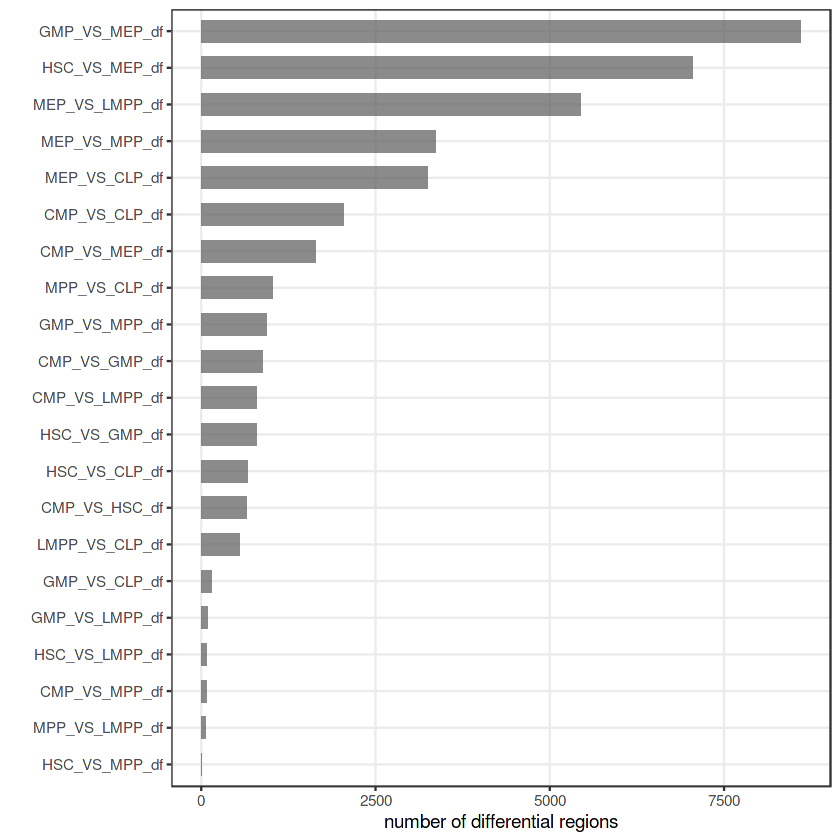

In [25]:
library(ggplot2)
library(dplyr)
library(forcats)
# Reorder following the value of another column:
plot_num_diff_regions_per_comparison <-num_diff_reg_per_comparison_df %>%
  mutate(comparisons = fct_reorder(comparisons, num_diff_reg)) %>%
  ggplot( aes(x=comparisons, y=num_diff_reg)) +
    geom_bar(stat="identity", , alpha=.7, width=.6) +
    coord_flip() +
    xlab("") + ylab("number of differential regions") +
    scale_y_continuous(minor_breaks = seq(0, 80000, 5000),) +
    theme_bw()
plot_num_diff_regions_per_comparison

In [26]:
ggsave("./figures/plot_num_diff_regions_per_comparison.png")


Saving 6.67 x 6.67 in image



# ------------------------------------------------------------
### SELECT THE FEATURES CONSIDERING THE TREE STRUCTURE
# ------------------------------------------------------------

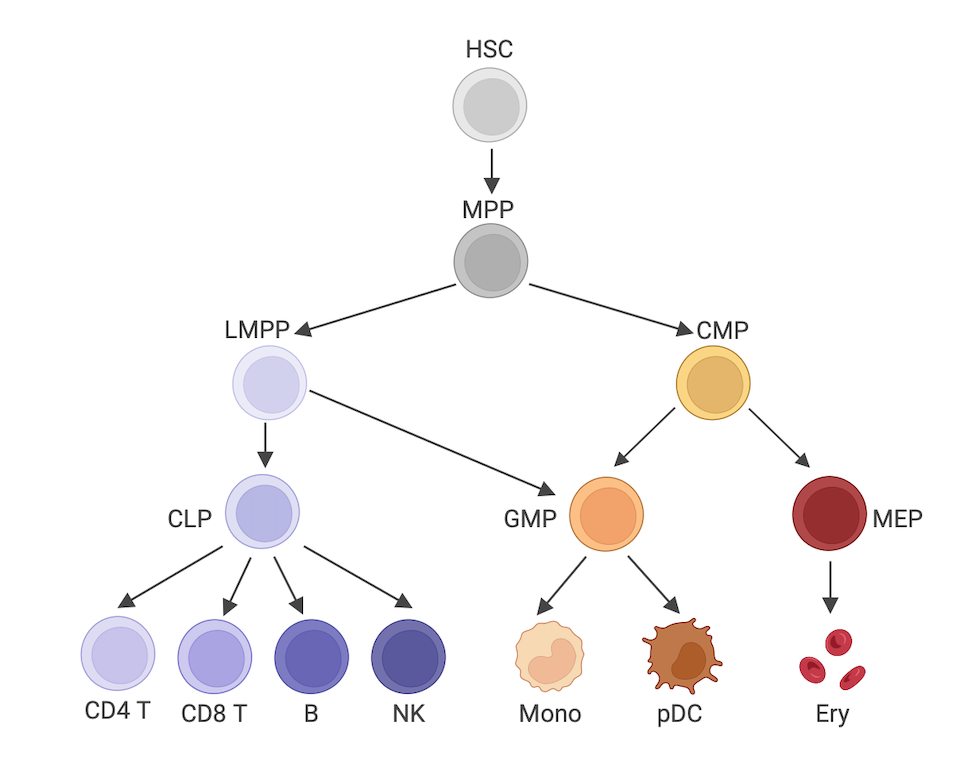

In [30]:
library("IRdisplay")

display_png(file="./hematopoiesis.png")


### tree guided comparisons 

> HSC_VS_MPP_df, MPP_VS_LMPP_df, LMPP_VS_CLP_df, GMP_VS_LMPP_df, CMP_VS_MPP_df,CMP_VS_GMP_df, CMP_VS_MEP_df, CMP_VS_LMPP_df, GMP_VS_CLP_df,GMP_VS_MEP_df 


In [31]:

# SELECT THE FEATURES CONSIDERING THE TREE STRUCTURE

# I exclude HSC_VS_MPP_df df because this has no differential reads and returns an empty df

tree_guided_combined_regions_top2000 =c()
for (df_ in list( MPP_VS_LMPP_df, LMPP_VS_CLP_df, GMP_VS_LMPP_df, CMP_VS_MPP_df,CMP_VS_GMP_df, CMP_VS_MEP_df, CMP_VS_LMPP_df, GMP_VS_CLP_df,GMP_VS_MEP_df )){
    df_= df_[df_[["seqnames"]] !="chrY",]
    if (NROW(df_) >2000){
        top2000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:2000,][["region"]]
        top2000_merged_name = gsub(":", "_", gsub("-", "_", top2000_regions, fixed = TRUE) , fixed = TRUE)
        tree_guided_combined_regions_top2000 =  c(tree_guided_combined_regions_top2000,top2000_merged_name )
    }else{ 
        all_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][["region"]]
        all_regions_merged_name = gsub(":", "_", gsub("-", "_", all_regions, fixed = TRUE) , fixed = TRUE)
        tree_guided_combined_regions_top2000 =  c(tree_guided_combined_regions_top2000,all_regions_merged_name )
    }
}




In [32]:
length(tree_guided_combined_regions_top2000)

[1] 6225

In [33]:
tree_guided_combined_regions_top2000_sorted = sort(tree_guided_combined_regions_top2000)


In [34]:
library(tidyverse)
tree_guided_combined_regions_top2000_3col = as.data.frame(tree_guided_combined_regions_top2000_sorted) %>% 
   separate(tree_guided_combined_regions_top2000_sorted, into = c("seq", "start", "end"), sep="_")


── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.0
✔ readr   2.1.3     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::ren

In [35]:
write.table(tree_guided_combined_regions_top2000_3col, "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)



cd ../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/

sort-bed buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05.bed >  buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05_sorted.bed 

bedops --element-of 1 ../../../data/ENCODE_cCREs/V2.hg38-cCREs-3col_sorted.bed buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05_sorted.bed  > buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05_sorted_exactcCREs.bed

In [36]:
exact_match_differential_cCREs = read.table("../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05_sorted_exactcCREs.bed", header = FALSE, sep="\t")



In [37]:
head(exact_match_differential_cCREs)

,V1,V2,V3
,<chr>,<int>,<int>
1,chr1,1143719,1144060
2,chr1,1144085,1144425
3,chr1,1144468,1144736
4,chr1,1144786,1145009
5,chr1,1145090,1145439
6,chr1,1370999,1371293


In [38]:
exact_match_differential_cCREs["region"]=paste(exact_match_differential_cCREs$V1, exact_match_differential_cCREs$V2, exact_match_differential_cCREs$V3, sep="_")

In [39]:
dim(exact_match_differential_cCREs)

[1] 9121    4

In [40]:
write.table(exact_match_differential_cCREs["region"], "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_differential_cCREs_FDR0.05_sorted_exactcCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [41]:
saveRDS(corces_norm, "./WS/buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_corces_norm.RDS")


# ------------------------------------------------------------
### SELECT THE FEATURES WITHOUT CONSIDERING THE TREE STRUCTURE
### PAIRWISE COMAPRISON OF CELL TYPES
#### unsupervised feature selection
# ------------------------------------------------------------

corces_norm

In [2]:
# load data
corces_norm = readRDS("/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/preprocessing/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/WS/buenrostro2018_sc_aggregated_pseudobulk_tree_guided_top2k_corces_norm.RDS")

In [3]:
contrast_matrix = dba.show(corces_norm, bContrasts = TRUE)
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,CMP,2,HSC,2,653
2,Condition,CMP,2,GMP,2,875
3,Condition,CMP,2,MEP,2,1637
4,Condition,CMP,2,MPP,2,71
5,Condition,CMP,2,CLP,2,2040
6,Condition,CMP,2,LMPP,2,788
7,Condition,HSC,2,GMP,2,787
8,Condition,HSC,2,MEP,2,7053
9,Condition,HSC,2,MPP,2,0


In [4]:
granges_to_df <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    report_df <- as.data.frame(report)
    region= paste(report_df$seqnames,report_df$start,sep=":")
    region=paste(region,report_df$end,sep="-")
    report_df["region"]=region
    return(report_df)
}

In [5]:
for (i in seq(1, NROW(contrast_matrix))){
    save_name = paste( gsub("-", "_", contrast_matrix[i,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[i,4], fixed = TRUE), sep="")
    
    print(save_name)
}

[1] "CMP_VS_HSC"
[1] "CMP_VS_GMP"
[1] "CMP_VS_MEP"
[1] "CMP_VS_MPP"
[1] "CMP_VS_CLP"
[1] "CMP_VS_LMPP"
[1] "HSC_VS_GMP"
[1] "HSC_VS_MEP"
[1] "HSC_VS_MPP"
[1] "HSC_VS_CLP"
[1] "HSC_VS_LMPP"
[1] "GMP_VS_MEP"
[1] "GMP_VS_MPP"
[1] "GMP_VS_CLP"
[1] "GMP_VS_LMPP"
[1] "MEP_VS_MPP"
[1] "MEP_VS_CLP"
[1] "MEP_VS_LMPP"
[1] "MPP_VS_CLP"
[1] "MPP_VS_LMPP"
[1] "LMPP_VS_CLP"


In [6]:
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,CMP,2,HSC,2,653
2,Condition,CMP,2,GMP,2,875
3,Condition,CMP,2,MEP,2,1637
4,Condition,CMP,2,MPP,2,71
5,Condition,CMP,2,CLP,2,2040
6,Condition,CMP,2,LMPP,2,788
7,Condition,HSC,2,GMP,2,787
8,Condition,HSC,2,MEP,2,7053
9,Condition,HSC,2,MPP,2,0


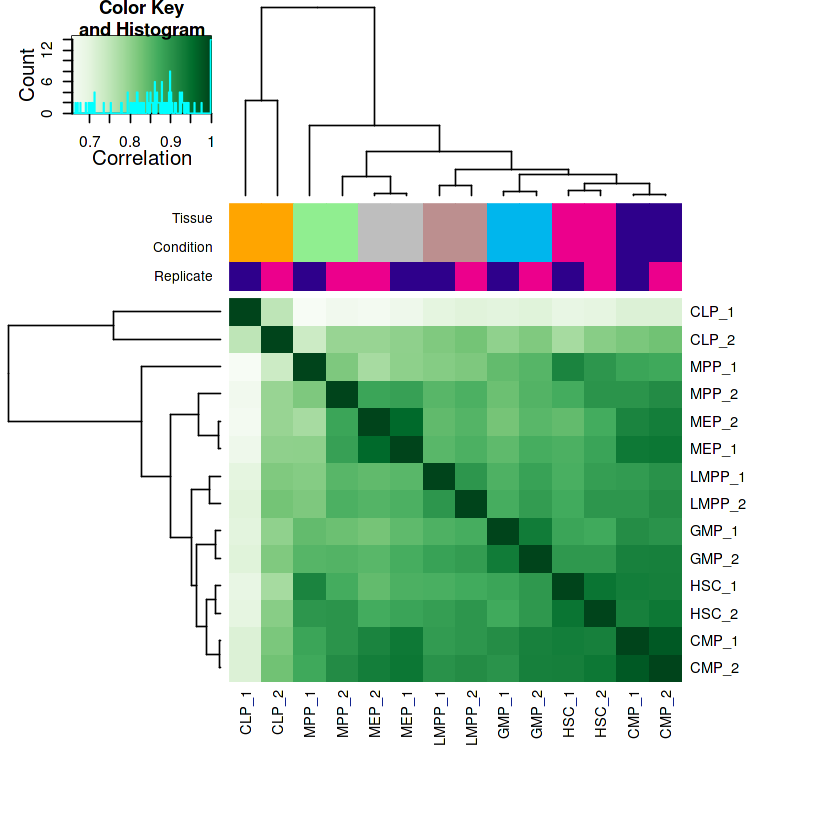

In [7]:
plot(corces_norm)

In [8]:
CMP_VS_HSC_df = granges_to_df(corces_norm, contrast = 1)
CMP_VS_GMP_df = granges_to_df(corces_norm, contrast = 2)
CMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 3)
CMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 4)
CMP_VS_CLP_df = granges_to_df(corces_norm, contrast = 5)
CMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 6)
HSC_VS_GMP_df = granges_to_df(corces_norm, contrast = 7)
HSC_VS_MEP_df = granges_to_df(corces_norm, contrast = 8)
HSC_VS_MPP_df = granges_to_df(corces_norm, contrast = 9)
HSC_VS_CLP_df = granges_to_df(corces_norm, contrast = 10)
HSC_VS_LMPP_df = granges_to_df(corces_norm, contrast = 11)
GMP_VS_MEP_df = granges_to_df(corces_norm, contrast = 12)
GMP_VS_MPP_df = granges_to_df(corces_norm, contrast = 13)
GMP_VS_CLP_df = granges_to_df(corces_norm, contrast = 14)
GMP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 15)
MEP_VS_MPP_df = granges_to_df(corces_norm, contrast = 16)
MEP_VS_CLP_df = granges_to_df(corces_norm, contrast = 17)
MEP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 18)
MPP_VS_CLP_df = granges_to_df(corces_norm, contrast = 19)
MPP_VS_LMPP_df = granges_to_df(corces_norm, contrast = 20)
LMPP_VS_CLP_df = granges_to_df(corces_norm, contrast = 21)


Warning message:
“No sites above threshold”


In [12]:

# SELECT THE FEATURES EITHOUT CONSIDERING THE TREE STRUCTURE

# I exclude HSC_VS_MPP_df df because this has no differential reads and returns an empty df

pairwise_comparison_combined_regions_top2000 =c()
for (df_ in list(CMP_VS_HSC_df,CMP_VS_GMP_df,CMP_VS_MEP_df,CMP_VS_MPP_df,CMP_VS_CLP_df,CMP_VS_LMPP_df,HSC_VS_GMP_df,HSC_VS_MEP_df,HSC_VS_CLP_df,HSC_VS_LMPP_df,GMP_VS_MEP_df,GMP_VS_MPP_df,GMP_VS_CLP_df,GMP_VS_LMPP_df,MEP_VS_MPP_df,MEP_VS_CLP_df,MEP_VS_LMPP_df,MPP_VS_CLP_df,MPP_VS_LMPP_df,LMPP_VS_CLP_df)){
    df_= df_[df_[["seqnames"]] !="chrY",]
    if (NROW(df_) >2000){
        top2000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:2000,][["region"]]
        top2000_merged_name = gsub(":", "_", gsub("-", "_", top2000_regions, fixed = TRUE) , fixed = TRUE)
        pairwise_comparison_combined_regions_top2000 =  c(pairwise_comparison_combined_regions_top2000,top2000_merged_name )
    }else{ 
        all_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][["region"]]
        all_regions_merged_name = gsub(":", "_", gsub("-", "_", all_regions, fixed = TRUE) , fixed = TRUE)
        pairwise_comparison_combined_regions_top2000 =  c(pairwise_comparison_combined_regions_top2000,all_regions_merged_name )
    }
}



In [13]:
length(pairwise_comparison_combined_regions_top2000)

[1] 20370

In [14]:
pairwise_comparison_combined_regions_top2000_sorted = sort(pairwise_comparison_combined_regions_top2000)


In [15]:
library(tidyverse)
pairwise_comparison_combined_regions_top2000_3col = as.data.frame(pairwise_comparison_combined_regions_top2000_sorted) %>% 
   separate(pairwise_comparison_combined_regions_top2000_sorted, into = c("seq", "start", "end"), sep="_")


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.6      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        m

In [46]:
write.table(pairwise_comparison_combined_regions_top2000_3col, "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top2k_differential_cCREs_FDR0.05.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [64]:
exact_match_pairwise_differential_cCREs_top2000= read.table("../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top2k_differential_cCREs_FDR0.05_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [65]:
dim(exact_match_pairwise_differential_cCREs_top2000)

[1] 16992     3

In [66]:
exact_match_pairwise_differential_cCREs_top2000["region"]=paste(exact_match_pairwise_differential_cCREs_top2000$V1, exact_match_pairwise_differential_cCREs_top2000$V2, exact_match_pairwise_differential_cCREs_top2000$V3, sep="_")

In [67]:
head(exact_match_pairwise_differential_cCREs_top2000)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1143719,1144060,chr1_1143719_1144060
2,chr1,1144085,1144425,chr1_1144085_1144425
3,chr1,1144468,1144736,chr1_1144468_1144736
4,chr1,1144786,1145009,chr1_1144786_1145009
5,chr1,1145090,1145439,chr1_1145090_1145439
6,chr1,1370999,1371293,chr1_1370999_1371293


In [68]:
write.table(exact_match_pairwise_differential_cCREs_top2000["region"], "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top2k_differential_cCREs_FDR0.05_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)


# decrease the # of regions to consider per comparison to top 1k as most of the comparisons have less than 2k

In [26]:

# SELECT THE FEATURES WITHOUT CONSIDERING THE TREE STRUCTURE
# top 1000 regions

# I exclude HSC_VS_MPP_df df because this has no differential reads and returns an empty df

pairwise_comparison_combined_regions_top1000 =c()
for (df_ in list(CMP_VS_HSC_df,CMP_VS_GMP_df,CMP_VS_MEP_df,CMP_VS_MPP_df,CMP_VS_CLP_df,CMP_VS_LMPP_df,HSC_VS_GMP_df,HSC_VS_MEP_df,HSC_VS_CLP_df,HSC_VS_LMPP_df,GMP_VS_MEP_df,GMP_VS_MPP_df,GMP_VS_CLP_df,GMP_VS_LMPP_df,MEP_VS_MPP_df,MEP_VS_CLP_df,MEP_VS_LMPP_df,MPP_VS_CLP_df,MPP_VS_LMPP_df,LMPP_VS_CLP_df)){
    df_= df_[df_[["seqnames"]] !="chrY",]
    if (NROW(df_) >1000){
        top1000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:1000,][["region"]]
        top1000_merged_name = gsub(":", "_", gsub("-", "_", top1000_regions, fixed = TRUE) , fixed = TRUE)
        pairwise_comparison_combined_regions_top1000 =  c(pairwise_comparison_combined_regions_top1000,top1000_merged_name )
    }else{ 
        all_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][["region"]]
        all_regions_merged_name = gsub(":", "_", gsub("-", "_", all_regions, fixed = TRUE) , fixed = TRUE)
        pairwise_comparison_combined_regions_top1000 =  c(pairwise_comparison_combined_regions_top1000,all_regions_merged_name )
    }
}



In [28]:
length(pairwise_comparison_combined_regions_top1000)

[1] 13709

In [22]:
length(pairwise_comparison_combined_regions_top2000)

[1] 20370

In [31]:
pairwise_comparison_combined_regions_top1000_sorted = sort(pairwise_comparison_combined_regions_top1000)


In [32]:
pairwise_comparison_combined_regions_top1000_3col = as.data.frame(pairwise_comparison_combined_regions_top1000_sorted) %>% 
   separate(pairwise_comparison_combined_regions_top1000_sorted, into = c("seq", "start", "end"), sep="_")


In [45]:
write.table(pairwise_comparison_combined_regions_top1000_3col, "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top1k_differential_cCREs_FDR0.05.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [59]:
exact_match_pairwise_differential_cCREs_top1000= read.table("../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top1k_differential_cCREs_FDR0.05_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [60]:
dim(exact_match_pairwise_differential_cCREs_top1000)

[1] 12244     3

In [61]:
exact_match_pairwise_differential_cCREs_top1000["region"]=paste(exact_match_pairwise_differential_cCREs_top1000$V1, exact_match_pairwise_differential_cCREs_top1000$V2, exact_match_pairwise_differential_cCREs_top1000$V3, sep="_")

In [62]:
head(exact_match_pairwise_differential_cCREs_top1000)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1143719,1144060,chr1_1143719_1144060
2,chr1,1144085,1144425,chr1_1144085_1144425
3,chr1,1144468,1144736,chr1_1144468_1144736
4,chr1,1144786,1145009,chr1_1144786_1145009
5,chr1,1145090,1145439,chr1_1145090_1145439
6,chr1,1370999,1371293,chr1_1370999_1371293


In [63]:
write.table(exact_match_pairwise_differential_cCREs_top1000["region"], "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top1k_differential_cCREs_FDR0.05_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)


# increase the # of regions to consider per comparison to top 3k as to proove that it does not increase the information gain

In [35]:

# SELECT THE FEATURES WITHOUT CONSIDERING THE TREE STRUCTURE
# top 3000 regions

# I exclude HSC_VS_MPP_df df because this has no differential reads and returns an empty df

pairwise_comparison_combined_regions_top3000 =c()
for (df_ in list(CMP_VS_HSC_df,CMP_VS_GMP_df,CMP_VS_MEP_df,CMP_VS_MPP_df,CMP_VS_CLP_df,CMP_VS_LMPP_df,HSC_VS_GMP_df,HSC_VS_MEP_df,HSC_VS_CLP_df,HSC_VS_LMPP_df,GMP_VS_MEP_df,GMP_VS_MPP_df,GMP_VS_CLP_df,GMP_VS_LMPP_df,MEP_VS_MPP_df,MEP_VS_CLP_df,MEP_VS_LMPP_df,MPP_VS_CLP_df,MPP_VS_LMPP_df,LMPP_VS_CLP_df)){
    df_= df_[df_[["seqnames"]] !="chrY",]
    if (NROW(df_) >3000){
        top3000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:3000,][["region"]]
        top3000_merged_name = gsub(":", "_", gsub("-", "_", top3000_regions, fixed = TRUE) , fixed = TRUE)
        pairwise_comparison_combined_regions_top3000 =  c(pairwise_comparison_combined_regions_top3000,top3000_merged_name )
    }else{ 
        all_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][["region"]]
        all_regions_merged_name = gsub(":", "_", gsub("-", "_", all_regions, fixed = TRUE) , fixed = TRUE)
        pairwise_comparison_combined_regions_top3000 =  c(pairwise_comparison_combined_regions_top3000,all_regions_merged_name )
    }
}



In [37]:
length(pairwise_comparison_combined_regions_top1000)

[1] 13709

In [38]:
length(pairwise_comparison_combined_regions_top2000)

[1] 20370

In [40]:
length(pairwise_comparison_combined_regions_top3000)

[1] 25410

In [41]:
pairwise_comparison_combined_regions_top3000_sorted = sort(pairwise_comparison_combined_regions_top3000)


In [42]:
pairwise_comparison_combined_regions_top3000_3col = as.data.frame(pairwise_comparison_combined_regions_top3000_sorted) %>% 
   separate(pairwise_comparison_combined_regions_top3000_sorted, into = c("seq", "start", "end"), sep="_")


In [52]:
write.table(pairwise_comparison_combined_regions_top3000_3col, "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top3k_differential_cCREs_FDR0.05.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


In [54]:
exact_match_pairwise_differential_cCREs_top3000= read.table("../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top3k_differential_cCREs_FDR0.05_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [55]:
dim(exact_match_pairwise_differential_cCREs_top3000)

[1] 21013     3

In [56]:
exact_match_pairwise_differential_cCREs_top3000["region"]=paste(exact_match_pairwise_differential_cCREs_top3000$V1, exact_match_pairwise_differential_cCREs_top3000$V2, exact_match_pairwise_differential_cCREs_top3000$V3, sep="_")

In [57]:
head(exact_match_pairwise_differential_cCREs_top3000)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1143719,1144060,chr1_1143719_1144060
2,chr1,1144085,1144425,chr1_1144085_1144425
3,chr1,1144468,1144736,chr1_1144468_1144736
4,chr1,1144786,1145009,chr1_1144786_1145009
5,chr1,1145090,1145439,chr1_1145090_1145439
6,chr1,1370999,1371293,chr1_1370999_1371293


In [58]:
write.table(exact_match_pairwise_differential_cCREs_top3000["region"], "../../../data/Buenrostro2018_FACS_BM_scATAC/feasibility_study_synthetic_prototypes/03_get_differentially_accessible_regions/buenrostro2018_sc_aggregated_pseudobulk_pairwise_comparison_combined_regions_top3k_differential_cCREs_FDR0.05_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)
